<a href="https://colab.research.google.com/github/frank-895/machine_learning_journey/blob/main/CNNs/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Networks - Deep Dive

## Introduction

So far, we've learnt about the start of a machine learning models - the inputs. These can be categories, embeddings (basically a one-hot-encoded category) or continuous numbers.

We've also learnt about what comes out the end of the model - activations. These are tensors of numbers which we can constrain with softmax.

We've also had a little look at what can be in the middle, like matrix multipliers and activation functions.

But, there are other things that can go in the middle. A convolutional neural network is a type of NN that works very well in computer vision applications.

## What are Convolutions?

A convolution is a mathematical operation that can extract **spatial features** from an image.

A small **filter** (AKA a **kernel**) slides over the image. At each position, the dot product between the filter and the image region is computed. This produces a "feature map".

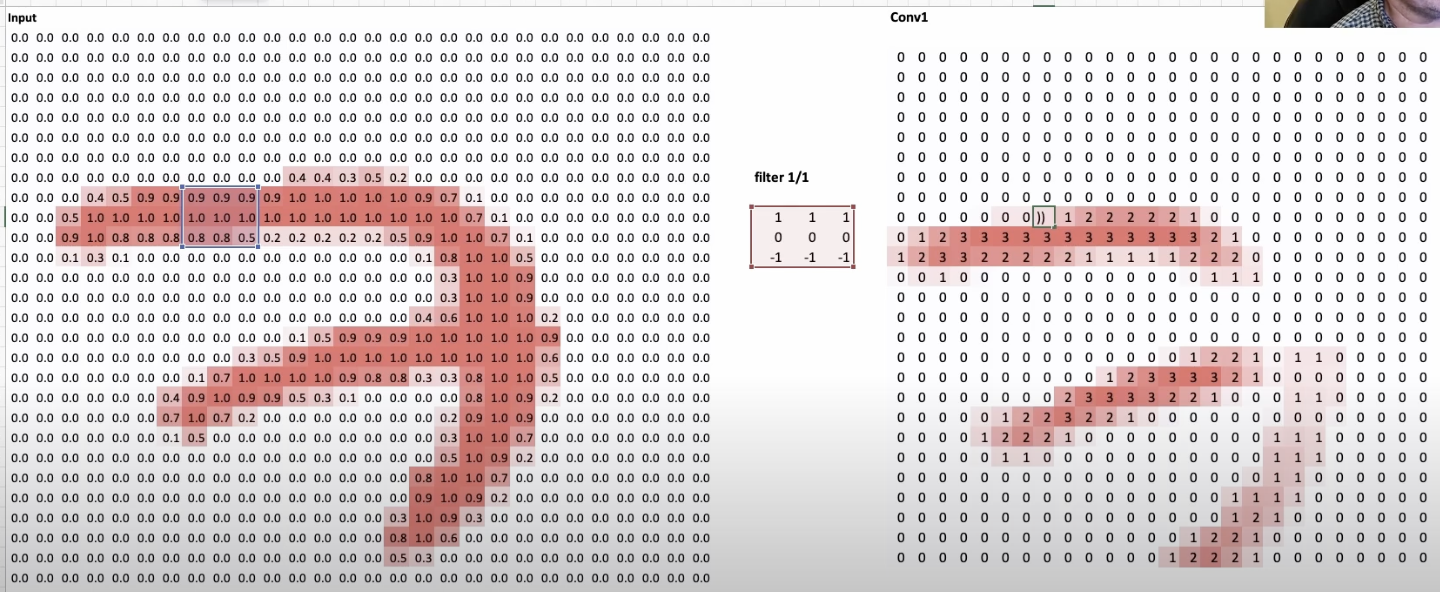

In this example we have a filter that acts as a top edge detector. We will use the filter on the input (on the left). We use the filter as a **sliding window**, applying it to every group of 9 cells.

The output from the filter will be a larger number when a horizontal top edge is detected. The 3 top cells will be added and the bottom 3 cells will be subtracted. So if the top 3 numbers are larger and the bottom three numbers are smaller, we will end up with a larger output.

We will then apply an activation function on the output, turning negative numbers into 0.

And that is a convolution! In practice (for deep learning), the filters would be initially random (rather than specifically edge detectors). However, when neural networks are analysed closely, lines and edges are typically the first things 'identified' in the inital layers of a neural network.

In the above example we used a **kernel size** of 3 x 3, but we can use any size we like.

## How does a Convolutional Neural Network Work?

Because we are **deep learning**, a CNN will repeat multiple convolutions.

At each layer of the neural network we will have multiple **channels** - the first layer might detect vertical and horizontal lines for red, green *and* blue. So, a colour 28 * 28 image with 32 filters will output 32 channels, each detecting different types of features. These 32 channels can be used in further convolutions to create activations which will be used in further outputs, until the final layer.

Using SGD the usual way, we will backpropogate through all our filters, optimising their values. The filters are the **learnable parameters** of a CNN.

## How do we reduce the number of activations to produce an appropriately sized tensor for our predictions?

By reducing the number of outputs, we can produce, in our final layer, a tensor of an appropriate size for our predictions. If we were classifying the MNIST dataset, we would want our tensor to be of size 10 (one for each digit).

The individual implementation of each CNN will differ but there are a number of techniques listed below:

## Stride-k Convolution

Most often, to reduce the number of activations, the sliding window will skip over some columns and rows (e.g., every second column and row) and this would reduce the number of outputs. This is called a **stride-k** convolution, where k is the number of rows/cols that are skipped over. A stride-2 convolution would leave you with a grid 25% of the original size.

### Maxpool

**Maxpool** is less commonly used, where you take the largest value out of every group of 4 (or 9 or 16 or so on) cells. A **2 by 2 maxpooling** would be taking the largest value out of every 4 cells, leaving us only a quarter of the number of activations.

### Average Pool

Much like **maxpool** but more commonly used these days. Instead of taking the largest value out of a group of cells, you take the mean value of a group of cells.

This is an important time to note why understanding the underlying implementation is so important.

For example, imagine we are creating a bear detector. We use stride-k convolutions to reduce our image down until it is a 7x7 grid. If we apply average pool to our 7x7 grid we are essentially asking the model to predict for each of the cells "*is there a bear in this cell?*". Then we take the average of the predictions. So, if there is a tiny bear in the corner of the photo - our model may be very inaccurate. In this situation, **maxpooling may be better suited to our needs** as this will produce a better prediction if *only one* of our 7x7 cells is predicted to contain a bear.

Often, these underlying details are ignored, but it is clear that they can make a big difference when tailoring our model to the **specific needs of the problem**.

> It's worth noting here - FastAI actually uses both maxpool and average pool, concatenating them together.

### Dense Layer

At some point, once the number of activations has been reduced sufficiently, you can perform a dot product between the activation matrix and an array of coefficients of the same size, called **dense weights**. The single output from this operation will be the prediction. The output can also be a tensor of an arbitrary size by increasing the number of dense weights matrices.

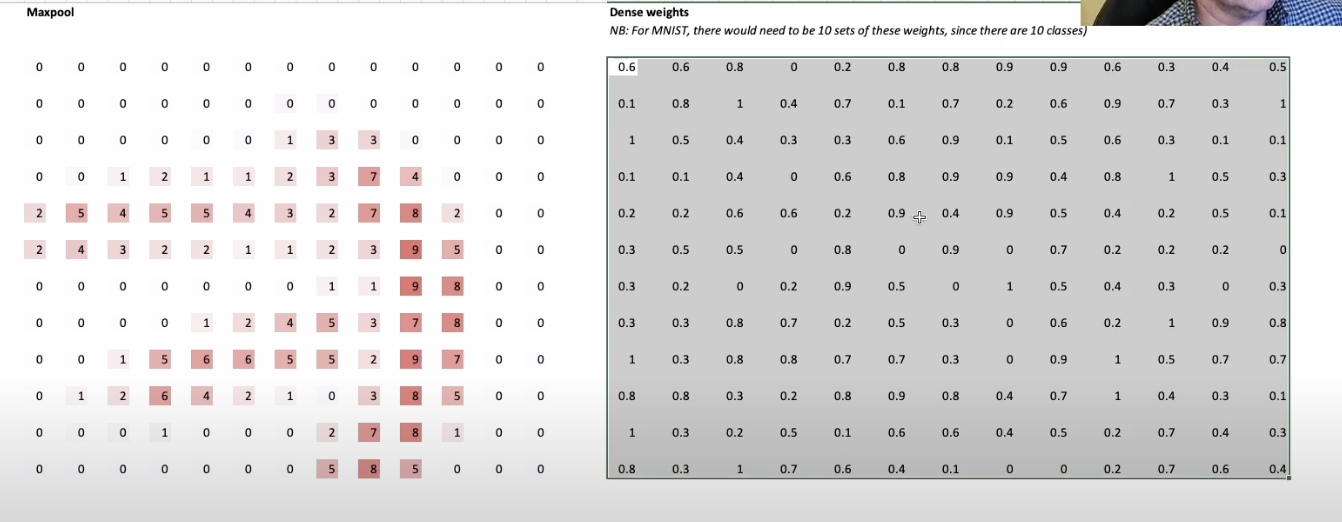

In this example, we can see that taking the dot product of our activations and our dense weights in the dense layer will produce a single prediction. The parameters, or coefficients, in the dense weights matrix would be updated through SGD.

## Dropout

**Dropout** is another noteworthy technique, commonly employed in CNNs (as well as other neural networks) as a **regularization** technique to avoid **overfitting**.

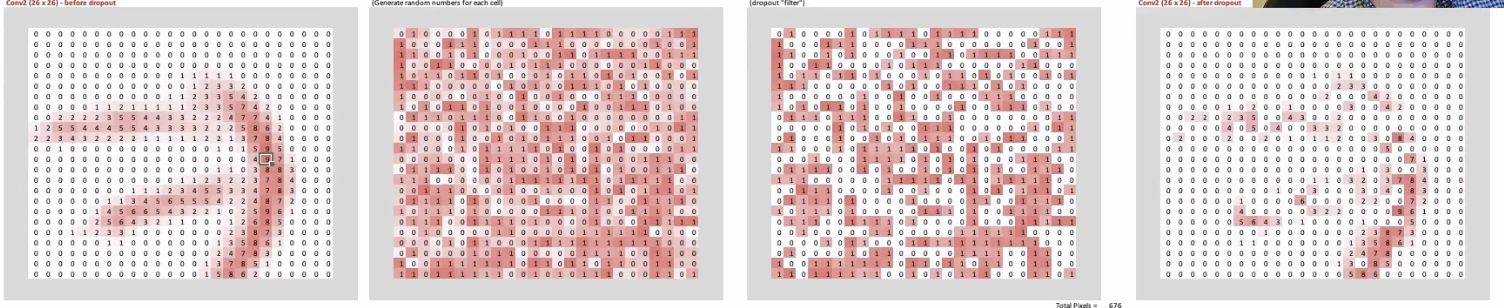

To explain it, let's use the example from above.

The first array represents our **filtered image** - the input for this layer.

The second array is randomly generated digits between 0 and 1 (their display is rounded, hence why they do not appear as floats).

We set a **dropout factor**, for example 0.5. Any numbers less than 0.5 will be made 0 and any numbers greater than 0.5 will be made 1. This is displayed in the third array, which is called the **dropout mask**.

Finally, the fourth array represents the dropout mask multiplied by the filtered image. Any 0 value in the dropout mask will no longer appear in the filtered image, essentially removing ~50% (or whatever our dropout mask is) of the pixels. This fourth array will be used as the input for the next layer.

This technique enables the model to better generalise, as it is corrupted. If a human is able to read the corrupted image, the idea is that the computer should be able to as well. If we randomly delete bits each time, the model is forced to learn the underlying real representation rather than overfitting.

You can actually think of this technique as a form of **data augmentation**, except it is being applied to the activations *rather than* the inputs.

A larger dropout will improve generalisation but a smaller dropout will improve performance on the training data.

## Activation Functions

So far, we've only talked about **ReLU** as an activation function but there are actually *many* types. But, it turns out, the activation function is not so important, and generally any non-linearity works fine. ReLU is a nice, understandable option.

## Conclusion

The important take-home is how convolutions work - they are the critical component of a CNN.

In CNN architectures, stride-k convolutions, maxpool, average pool and dense layers will be used to reduce the size of our array. This enables the model to produce a final output of the appropriate size for the problem.

Overall, CNNs can be complex, but the underlying core logic is not too difficult to understand.

Thank you for reading my notebook and thank you to FastAI for providing the material in their course [Practical Deep Learning for Coders](https://course.fast.ai/).
